verifying the accuracy of clusters given by k-means clustering  of various embeddings using diversification labels.

In [520]:
import pandas as pd 
#load all pyktok data
with open('../data/pyktok_output.csv','r') as f:
    df_pyktok_raw = pd.read_csv(f)
    f.close()

In [521]:
df_pyktok_raw

,video_id,video_timestamp,video_duration,video_locationcreated,suggested_words,diversificationLabels,video_diggcount,video_sharecount,video_commentcount,video_playcount,...,video_is_ad,video_stickers,author_username,author_name,author_followercount,author_followingcount,author_heartcount,author_videocount,author_diggcount,author_verified
0,7351504547858189611,2024-03-28T15:52:51,27.0,US,"Keemokazi, sophie hesri, keemokazi sisters, ke...","Pranks,Performance",402400.0,6165.0,3037.0,4200000.0,...,False,NaN,keemokazi,KEEMOKAZI,NaN,NaN,NaN,NaN,NaN,True
1,7344727060050496811,2024-03-10T09:33:05,13.0,US,NaN,NaN,18600.0,1524.0,1495.0,307000.0,...,False,NaN,americafirst617,AmericaFirst617,NaN,NaN,NaN,NaN,NaN,False
2,7327392260943908142,2024-01-23T15:25:09,10.0,US,"ivan young dress, ivan young, Wedding Dress, i...","Outfit,Beauty & Style",3400000.0,48500.0,11700.0,21200000.0,...,False,NaN,bitchettez,💋,NaN,NaN,NaN,NaN,NaN,False
3,7352880879674346795,2024-04-01T08:54:12,6.0,US,"cybertruck, cybertruck fail, Cybertruck Crash ...",Random Shoot,465500.0,47800.0,2598.0,8200000.0,...,False,NaN,hemersonflorz503,hemersonflorzs503,NaN,NaN,NaN,NaN,NaN,False
4,7342131079178128686,2024-03-03T08:39:33,8.0,US,"Olivia Rodrigo, crumblcookies, olivia rodrigo ...","Food Tour & Recommendations,Lifestyle",39500.0,279.0,111.0,929700.0,...,False,NaN,constanceiam,🦋 Constance,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,7333769581942672682,2024-02-09T19:51:52,29.0,US,"whip, Cracking A Whips, guy whips massive chai...","Traditional Sports,Sport & Outdoor",38100.0,767.0,1245.0,690600.0,...,False,NaN,winrichadam,winrichadam,NaN,NaN,NaN,NaN,NaN,False
2182,7358821752132078866,2024-04-17T09:06:50,14.0,US,NaN,"Outfit,Beauty & Style",115.0,3.0,22.0,782.0,...,False,NaN,tayyabawan751,🦁 طیب اعوان 🦁🗡️🦍,NaN,NaN,NaN,NaN,NaN,False
2183,7337631130629229829,2024-02-20T05:36:22,16.0,PH,"people, xia speaking british, xia boyfriend, p...","Finger Dance & Basic Dance,Talents",1400000.0,9923.0,22600.0,10700000.0,...,False,NaN,xiavigor__,xia,NaN,NaN,NaN,NaN,NaN,False
2184,7359982276802792710,2024-04-20T12:10:13,15.0,PK,NaN,Random Shoot,889.0,3.0,65.0,3093.0,...,False,NaN,saqibmurshid302,saqibmurshid,NaN,NaN,NaN,NaN,NaN,False


## diversificationLabels analysis
Q1: how many categories are there? <br>
Q2: Bar graph of each category

In [525]:
# we go through each row to count the categories
from collections import Counter
num_categories = Counter()
count = Counter()
noncount = 0 

def split_and_increment(row):
    global noncount 
    diversificationLabels = row['diversificationLabels']
    if type(diversificationLabels)==str:
        categories = diversificationLabels.split(',')
        num_categories.update((len(categories),1))
        count.update(categories)
    else:
        noncount+=1
        


df_pyktok_raw.apply(split_and_increment,axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
2181    None
2182    None
2183    None
2184    None
2185    None
Length: 2186, dtype: object

In [526]:
noncount

146

In [415]:
print(f"unique categories: {len(count)}, unique num per video: {len(num_categories)}")
print(num_categories)

unique categories: 81, unique num per video: 3
Counter({1: 2452, 2: 1548, 3: 80})


In [534]:
#create heatmap to see what categories often occur together
unique_category = sorted(count.keys())
co_occurrence_matrix = pd.DataFrame(0, index=unique_category, columns=unique_category)

def populate_matrix(row):
    diversificationLabels = row['diversificationLabels']
    if type(diversificationLabels)==str:
        categories = diversificationLabels.split(',')
        for i in range(len(categories)):
            for j in range(i + 1, len(categories)):
                co_occurrence_matrix.loc[categories[i], categories[j]] += 1
                co_occurrence_matrix.loc[categories[j], categories[i]] += 1

df_pyktok_raw.apply(populate_matrix,axis=1)
for cat in unique_category:
    co_occurrence_matrix.loc[cat,cat] = count[cat]

#co_occurrence_matrix = co_occurrence_matrix.div(co_occurrence_matrix.sum(axis=1), axis=0)

print(co_occurrence_matrix)


                        Anime   Hunting & Camping   Trucks & Motorcycles  \
 Anime                     21                   0                      0   
 Hunting & Camping          0                   2                      0   
 Trucks & Motorcycles       0                   0                     57   
Advertisement               0                   0                      0   
Auto & Vehicle              0                   0                     57   
...                       ...                 ...                    ...   
Toys & Collectables         0                   0                      0   
Traditional Sports          0                   0                      0   
Travel                      0                   0                      0   
Video Games                 0                   0                      0   
Work & Jobs                 0                   0                      0   

                       Advertisement  Auto & Vehicle  Babies  Beauty  \
 Anime         

In [544]:
def diversificationLabel_split(row):
    if type(row['diversificationLabels']) == str:
        category = row['diversificationLabels'].split(',')
        return category
    else:
        return None

df_pyktok_raw['label_list'] = df_pyktok_raw.apply(diversificationLabel_split,axis=1)

/var/folders/6y/w5dznchj3w9cyjt81v33hf1c0000gn/T/ipykernel_14827/2352286556.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




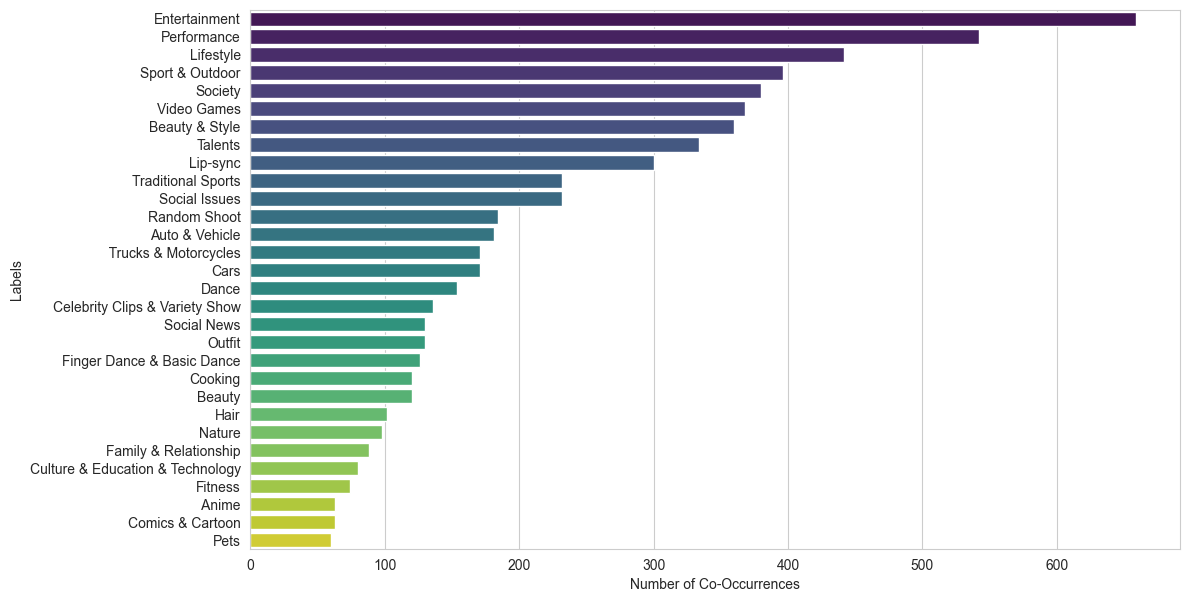

In [540]:
total_co_occurrences = co_occurrence_matrix.sum(axis=1).fillna(0).sort_values(ascending=False)
top30 = total_co_occurrences[:30] # out of 81
plt.figure(figsize=(12, 7))
sns.barplot(x=top30.values, y=top30.index, palette='viridis')
plt.xlabel('Number of Co-Occurrences')
plt.ylabel('Labels')
plt.show()

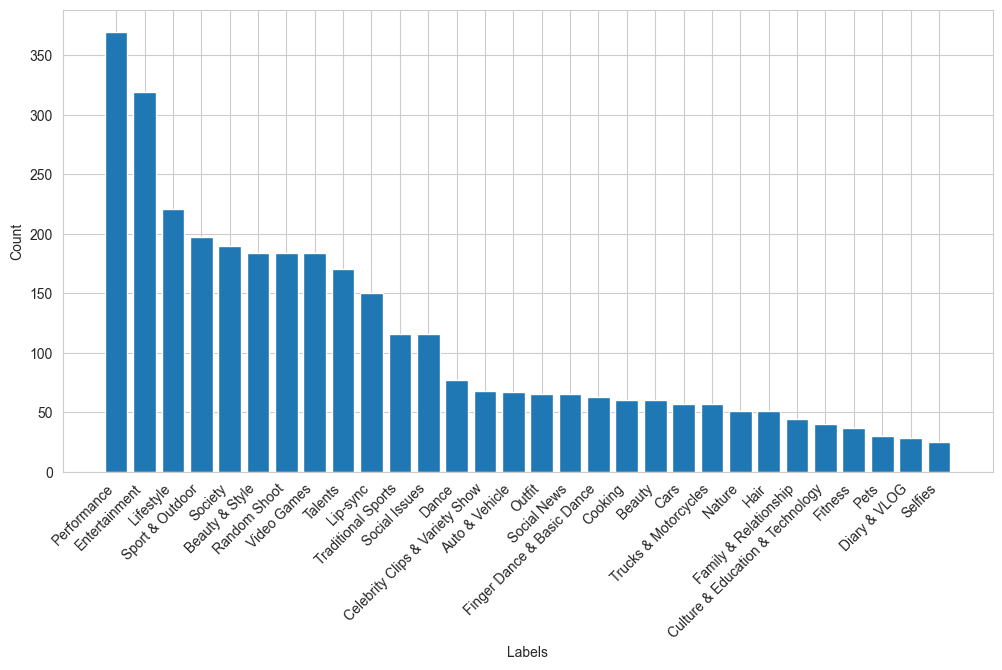

In [527]:
import matplotlib.pyplot as plt
top30 = dict(Counter(count).most_common(30))

plt.figure(figsize=(12, 6))

bar_width = 0.8 

plt.bar(range(len(top30)), top30.values(), width=bar_width)
plt.xticks(range(len(top30)), top30.keys(), rotation=45, ha='right')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

we want to compare the categories with the results of knn. 

In [440]:
from itertools import takewhile
more_than_100 = dict(takewhile(lambda i: i[1] > 100, count.most_common()))
print(more_than_100)
print(len(more_than_100))

{'Performance': 370, 'Entertainment': 319, 'Lifestyle': 221, 'Sport & Outdoor': 197, 'Society': 190, 'Beauty & Style': 184, 'Random Shoot': 184, 'Video Games': 184, 'Talents': 170, 'Lip-sync': 150, 'Traditional Sports': 116, 'Social Issues': 116}
12


In [441]:
def popularcategory(row):
    popular_category_list = []
    diversificationLabels = row['diversificationLabels']
    if type(diversificationLabels)==str:
        categories = diversificationLabels.split(',')
        for popular_cat in more_than_100:
            if popular_cat in categories:
                popular_category_list.append(popular_cat)
    if popular_category_list:
        return popular_category_list
    else:
        return None

df_pyktok_raw['popular_category'] = df_pyktok_raw.apply(popularcategory,axis=1)


In [443]:
#filter based on popular_category
df_pyktok_popular = df_pyktok_raw[df_pyktok_raw['popular_category'].notna()]
print(len(df_pyktok_popular))

1835


In [444]:
df_pyktok_popular.reset_index(inplace = True)

In [561]:
df_pyktok_raw_heatmap = df_pyktok_raw[df_pyktok_raw['label_list'].notna()]


In [619]:
#all
bag_of_words_df = pd.DataFrame(0, index=df_pyktok_raw_heatmap.index, columns=list(count.keys()))
bag_of_words_df.reset_index(inplace = True)
for idx, categories in enumerate(df_pyktok_raw_heatmap['label_list']):
    for category in categories:
        bag_of_words_df.at[idx, category] = 1

""" #popular
bag_of_words_df = pd.DataFrame(0, index=df_pyktok_popular.index, columns=list(more_than_100.keys()))
bag_of_words_df.reset_index(inplace = True)
for idx, categories in enumerate(df_pyktok_popular['popular_category']):
    for category in categories:
        bag_of_words_df.at[idx, category] = 1
"""

"\nbag_of_words_df = pd.DataFrame(0, index=df_pyktok_popular.index, columns=list(more_than_100.keys()))\nbag_of_words_df.reset_index(inplace = True)\nfor idx, categories in enumerate(df_pyktok_popular['popular_category']):\n    for category in categories:\n        bag_of_words_df.at[idx, category] = 1\n"

In [620]:
bag_of_words_df.drop(columns=['index'])

,Pranks,Performance,Outfit,Beauty & Style,Random Shoot,Food Tour & Recommendations,Lifestyle,Traditional Sports,Sport & Outdoor,Nature,...,Entertainment News,Software & APPs,Supernatural & Horror,Science,Motivation,Scripted Drama,Environmental Protections,Life Hacks,Theatre & Stage,School Education
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2036,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2038,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [621]:
more_than_100

{'Performance': 370,
 'Entertainment': 319,
 'Lifestyle': 221,
 'Sport & Outdoor': 197,
 'Society': 190,
 'Beauty & Style': 184,
 'Random Shoot': 184,
 'Video Games': 184,
 'Talents': 170,
 'Lip-sync': 150,
 'Traditional Sports': 116,
 'Social Issues': 116}

In [622]:
ordered_labels

['Performance',
 'Entertainment',
 'Lifestyle',
 'Sport & Outdoor',
 'Society',
 'Beauty & Style',
 'Random Shoot',
 'Video Games',
 'Talents',
 'Lip-sync',
 'Traditional Sports',
 'Social Issues',
 'Dance',
 'Celebrity Clips & Variety Show',
 'Auto & Vehicle',
 'Outfit',
 'Social News',
 'Finger Dance & Basic Dance',
 'Cooking',
 'Beauty',
 'Cars',
 ' Trucks & Motorcycles',
 'Nature',
 'Hair',
 'Family & Relationship',
 'Culture & Education & Technology',
 'Fitness',
 'Pets',
 'Diary & VLOG',
 'Selfies',
 'Romance',
 'Comics & Cartoon',
 ' Anime',
 'Sports News',
 'Food Display',
 'Tech Products & Infos',
 'Mukbangs & Tasting',
 'Extreme Sports',
 'Drinks',
 'Work & Jobs',
 'Movies & TV works',
 'Music',
 'Family',
 'Scenery & Plants',
 'Travel',
 'Babies',
 'Pranks',
 'Non-Video Games',
 'Scripted Comedy',
 'Home & Garden',
 'Singing & Instruments',
 'Street Interviews & Social Experiments',
 'Health & Wellness',
 'Graphic Art',
 'Toys & Collectables',
 'Farm Animals',
 'Humanities',

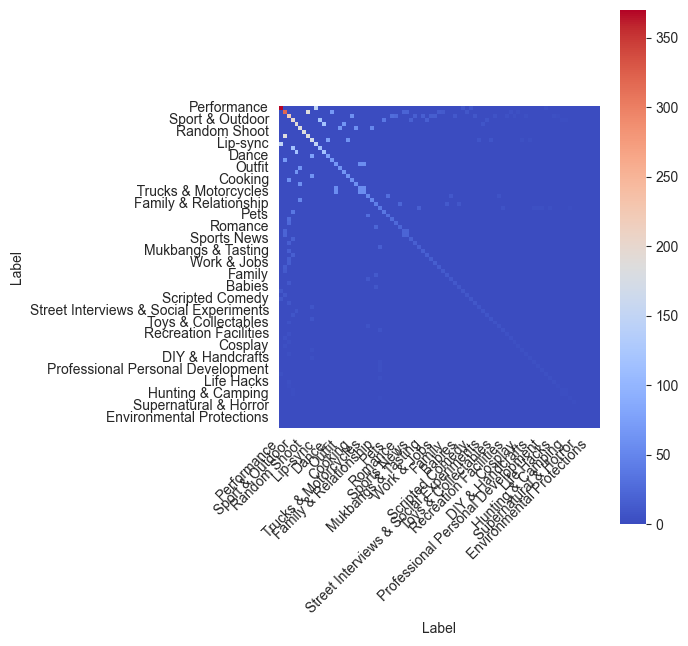

In [623]:
if 'index' in bag_of_words_df.columns:
    bag_of_words_df.drop(['index'], axis=1, inplace=True)

co_occurrence_matrix = bag_of_words_df.T.dot(bag_of_words_df)
ordered_labels = [label for label, _ in count.most_common()]
#ordered_labels = [key for _,key in enumerate(more_than_100)]
co_occurrence_matrix = co_occurrence_matrix.reindex(index=ordered_labels, columns=ordered_labels)
# Plot the heatmap
plt.figure(figsize=(7, 7))
sns.heatmap(co_occurrence_matrix, cmap='coolwarm', annot=False, cbar=True, square=True)
plt.xlabel('Label')
plt.ylabel('Label')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [628]:
co_occ = {}
for col in co_occurrence_matrix.columns:
    nonzero = co_occurrence_matrix[co_occurrence_matrix[col]!=0].index.tolist()
    co_occ[col] = nonzero

for column, nonzero_rows in co_occ.items():
    print(f"{column}: {nonzero_rows}")

Performance: ['Performance', 'Lip-sync', 'Pranks', 'Scripted Comedy', 'Hilarious Fails', 'Scripted Drama']
Entertainment: ['Entertainment', 'Video Games', 'Celebrity Clips & Variety Show', 'Comics & Cartoon', ' Anime', 'Movies & TV works', 'Music', 'Non-Video Games', 'Entertainment News', 'Cosplay', 'Theatre & Stage']
Lifestyle: ['Lifestyle', 'Cooking', 'Diary & VLOG', 'Selfies', 'Food Display', 'Mukbangs & Tasting', 'Drinks', 'Work & Jobs', 'Travel', 'Home & Garden', 'Toys & Collectables', 'Recreation Facilities', 'Oddly Satisfying', 'Campus Life', 'Life Hacks', 'Food Tour & Recommendations']
Sport & Outdoor: ['Sport & Outdoor', 'Traditional Sports', 'Fitness', 'Sports News', 'Extreme Sports', 'Health & Wellness', 'Fishing', ' Hunting & Camping']
Society: ['Society', 'Social Issues', 'Social News', 'Street Interviews & Social Experiments', 'Environmental Protections']
Beauty & Style: ['Beauty & Style', 'Outfit', 'Beauty', 'Hair']
Random Shoot: ['Random Shoot']
Video Games: ['Entertain

embeddings based on video description

In [451]:
df_pyktok_raw.reset_index()

,index,video_id,video_timestamp,video_duration,video_locationcreated,suggested_words,diversificationLabels,video_diggcount,video_sharecount,video_commentcount,...,video_stickers,author_username,author_name,author_followercount,author_followingcount,author_heartcount,author_videocount,author_diggcount,author_verified,popular_category
0,0,7351504547858189611,2024-03-28T15:52:51,27.0,US,"Keemokazi, sophie hesri, keemokazi sisters, ke...","Pranks,Performance",402400.0,6165.0,3037.0,...,NaN,keemokazi,KEEMOKAZI,NaN,NaN,NaN,NaN,NaN,True,[Performance]
1,1,7344727060050496811,2024-03-10T09:33:05,13.0,US,NaN,NaN,18600.0,1524.0,1495.0,...,NaN,americafirst617,AmericaFirst617,NaN,NaN,NaN,NaN,NaN,False,None
2,2,7327392260943908142,2024-01-23T15:25:09,10.0,US,"ivan young dress, ivan young, Wedding Dress, i...","Outfit,Beauty & Style",3400000.0,48500.0,11700.0,...,NaN,bitchettez,💋,NaN,NaN,NaN,NaN,NaN,False,[Beauty & Style]
3,3,7352880879674346795,2024-04-01T08:54:12,6.0,US,"cybertruck, cybertruck fail, Cybertruck Crash ...",Random Shoot,465500.0,47800.0,2598.0,...,NaN,hemersonflorz503,hemersonflorzs503,NaN,NaN,NaN,NaN,NaN,False,[Random Shoot]
4,4,7342131079178128686,2024-03-03T08:39:33,8.0,US,"Olivia Rodrigo, crumblcookies, olivia rodrigo ...","Food Tour & Recommendations,Lifestyle",39500.0,279.0,111.0,...,NaN,constanceiam,🦋 Constance,NaN,NaN,NaN,NaN,NaN,False,[Lifestyle]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,2181,7333769581942672682,2024-02-09T19:51:52,29.0,US,"whip, Cracking A Whips, guy whips massive chai...","Traditional Sports,Sport & Outdoor",38100.0,767.0,1245.0,...,NaN,winrichadam,winrichadam,NaN,NaN,NaN,NaN,NaN,False,"[Sport & Outdoor, Traditional Sports]"
2182,2182,7358821752132078866,2024-04-17T09:06:50,14.0,US,NaN,"Outfit,Beauty & Style",115.0,3.0,22.0,...,NaN,tayyabawan751,🦁 طیب اعوان 🦁🗡️🦍,NaN,NaN,NaN,NaN,NaN,False,[Beauty & Style]
2183,2183,7337631130629229829,2024-02-20T05:36:22,16.0,PH,"people, xia speaking british, xia boyfriend, p...","Finger Dance & Basic Dance,Talents",1400000.0,9923.0,22600.0,...,NaN,xiavigor__,xia,NaN,NaN,NaN,NaN,NaN,False,[Talents]
2184,2184,7359982276802792710,2024-04-20T12:10:13,15.0,PK,NaN,Random Shoot,889.0,3.0,65.0,...,NaN,saqibmurshid302,saqibmurshid,NaN,NaN,NaN,NaN,NaN,False,[Random Shoot]


In [452]:
def description_suggested(row):
    if type(row['video_description'])==str and type(row['suggested_words'])==str:
        return row['video_description']+row['suggested_words']
    if type(row['video_description'])==str and type(row['suggested_words'])!=str:
        return row['video_description']
    elif type(row['suggested_words'])==str and type(row['video_description'])!=str:
        return row['suggested_words']
    else:
        return None
def description_suggested_author(row):
    res = description_suggested(row)
    if res and type(row['suggested_words'])==str:
        return res+row['suggested_words']
    elif not res and type(row['suggested_words'])==str:
        return row['suggested_words']
    elif res and type(row['suggested_words'])!=str:
        return res
    else:
        return None

df_pyktok_raw['info_one'] = df_pyktok_raw['video_description']
df_pyktok_raw['info_two'] = df_pyktok_raw.apply(description_suggested,axis=1)
df_pyktok_raw['info_three'] = df_pyktok_raw.apply(description_suggested_author,axis=1)


In [453]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
def create_embeddings(row,target):
    if type(row[target])==str:
        return embed([row[target]])
    else:
        return None

df_pyktok_raw['embeddings_one'] = df_pyktok_raw.apply(lambda row: create_embeddings(row,'info_one'), axis=1)
df_pyktok_raw['embeddings_two'] = df_pyktok_raw.apply(lambda row: create_embeddings(row,'info_two'), axis=1)
df_pyktok_raw['embeddings_three'] = df_pyktok_raw.apply(lambda row: create_embeddings(row,'info_three'), axis=1)

In [454]:
df_pyktok_raw_one = df_pyktok_raw.dropna(subset=['embeddings_one'])
df_pyktok_raw_two = df_pyktok_raw.dropna(subset=['embeddings_two'])
df_pyktok_raw_three = df_pyktok_raw.dropna(subset=['embeddings_three'])

df_pyktok_raw_one.reset_index(inplace=True)
df_pyktok_raw_two.reset_index(inplace=True)
df_pyktok_raw_three.reset_index(inplace=True)

In [455]:
matrix_description_raw_one = np.vstack(df_pyktok_raw_one['embeddings_one'])
print(matrix_description_raw_one.shape)
matrix_description_raw_two = np.vstack(df_pyktok_raw_two['embeddings_two'])
print(matrix_description_raw_two.shape)
matrix_description_raw_three = np.vstack(df_pyktok_raw_three['embeddings_three'])
print(matrix_description_raw_three.shape)

(2002, 512)
(2038, 512)
(2038, 512)


In [456]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import plotly.express as px
import pandas as pd

# Step 2: now that we know k=3, we can perform k-means model
def draw_cluster_plot(n_clusters,df,matrix,target):
    kmeans = KMeans(n_clusters = n_clusters)
    kmeans.fit(matrix)

    df['cluster'] = kmeans.labels_

    #use TSNE to visualize high dim. data
    tsne = TSNE(n_components=2, perplexity=15, random_state=42, init="random", learning_rate=200)
    tsne_results = tsne.fit_transform(matrix)

    # Step 3: Append tsne_1, tsne_2 to df_hashtag
    df_tsne = pd.DataFrame(tsne_results, 
                    columns=['tsne_1', 'tsne_2'])

    df_res = pd.concat([df,df_tsne],axis=1)

    # Step 4: Use plotly to visualize it
    fig = px.scatter(df_res, x='tsne_1', y='tsne_2', color='cluster',hover_data= {target})
    fig.update_traces(textposition='top center', textfont=dict(size=6))
    fig.update_layout(title=f'Embeddings of TikTok Video Descriptions', hoverlabel=dict(
                                    font=dict(size=7),
                                    align="left"))
    return df_res, fig

In [466]:
output_csv_path = 'cluster_purity_results.csv'
import os

for embedding_type in ['description','description_suggested','description_suggested_author']:
    for k in range(3,81,3):
        if embedding_type == 'description':
            df = df_pyktok_raw_one
            matrix = matrix_description_raw_one
        elif  embedding_type =='description_suggested':
            df = df_pyktok_raw_two
            matrix = matrix_description_raw_two
        else:
            df = df_pyktok_raw_three
            matrix = matrix_description_raw_three
        df_res, fig = draw_cluster_plot(k,df,matrix,'video_description')
        df_compare = df_res[['label_list','cluster']]
        df_compare['label_list'] = df_compare['label_list'].apply(lambda x: x[0] if x else None)

        cluster_counts = df_compare.groupby(['cluster', 'label_list']).size().reset_index(name='count')

        total_counts = df_compare.groupby('cluster').size().reset_index(name='total_count')

        cluster_purity = pd.merge(cluster_counts, total_counts, on='cluster')

        cluster_purity['purity'] = cluster_purity['count'] / cluster_purity['total_count']

        max_purity = cluster_purity.loc[cluster_purity.groupby('cluster')['purity'].idxmax()]

        high_purity_clusters = max_purity[max_purity['purity'] > 0.5]
        label_high_purity_clusters = high_purity_clusters['label_list'].tolist()
        num_high_purity_clusters = len(high_purity_clusters)
        total_clusters = len(max_purity)
        percentage_high_purity_clusters = (num_high_purity_clusters / total_clusters) * 100

        print(embedding_type, k)
        print(f"Number of clusters with purity > 0.5: {num_high_purity_clusters}")
        print(f"Percentage of clusters with purity > 0.5: {percentage_high_purity_clusters:.2f}%")
        max_purity.to_csv(f'{embedding_type}_{k}.csv')

        results_data = {
            'embedding_type': [embedding_type],
            'k': [k],
            'num_high_purity_clusters': [num_high_purity_clusters],
            'percentage_high_purity_clusters': [percentage_high_purity_clusters],
            'label_high_purity_clusters': [label_high_purity_clusters]
        }
        results_df = pd.DataFrame(results_data)

        if not os.path.exists(output_csv_path):
            results_df.to_csv(output_csv_path, index=False)
        else:
            results_df.to_csv(output_csv_path, mode='a', header=False, index=False)

description 3
Number of clusters with purity > 0.5: 0
Percentage of clusters with purity > 0.5: 0.00%
description 6
Number of clusters with purity > 0.5: 0
Percentage of clusters with purity > 0.5: 0.00%
description 9
Number of clusters with purity > 0.5: 1
Percentage of clusters with purity > 0.5: 11.11%
description 12
Number of clusters with purity > 0.5: 2
Percentage of clusters with purity > 0.5: 16.67%
description 15
Number of clusters with purity > 0.5: 2
Percentage of clusters with purity > 0.5: 13.33%
description 18
Number of clusters with purity > 0.5: 2
Percentage of clusters with purity > 0.5: 11.11%
description 21
Number of clusters with purity > 0.5: 3
Percentage of clusters with purity > 0.5: 14.29%
description 24
Number of clusters with purity > 0.5: 5
Percentage of clusters with purity > 0.5: 20.83%
description 27
Number of clusters with purity > 0.5: 3
Percentage of clusters with purity > 0.5: 11.11%
description 30
Number of clusters with purity > 0.5: 8
Percentage of 

In [467]:
df_purity = pd.read_csv('./cluster_purity_results.csv')

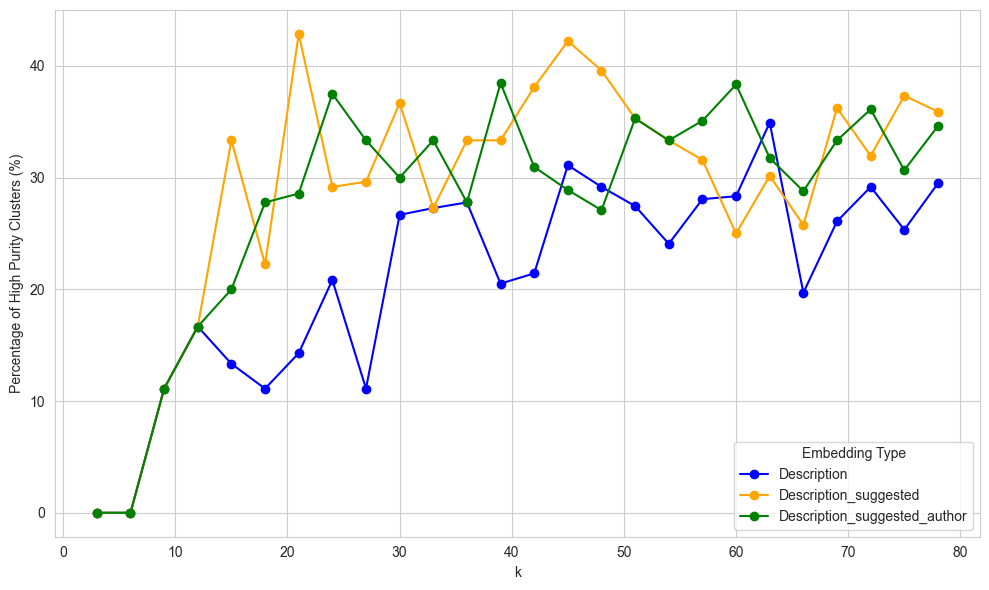

In [590]:
import matplotlib.pyplot as plt
embedding_types = df_purity['embedding_type'].unique()

colors = ['blue', 'orange', 'green']

plt.figure(figsize=(10, 6))
for i, embedding_type in enumerate(embedding_types):
    df_filtered = df_purity[df_purity['embedding_type'] == embedding_type]
    plt.plot(
        df_filtered['k'],
        df_filtered['percentage_high_purity_clusters'],
        marker='o',
        color=colors[i],
        label=embedding_type.capitalize()
    )
plt.xlabel('k')
plt.ylabel('Percentage of High Purity Clusters (%)')
plt.legend(title='Embedding Type')
plt.grid(True)
plt.tight_layout()

plt.savefig('combined_high_purity_clusters.png')
plt.show()


so best is 
description_suggested	21	9	42.857142857142854	['Video Games', 'Video Games', 'Fitness', 'Traditional Sports', 'Hair', 'Traditional Sports', 'Random Shoot', 'Social News', 'Beauty']

In [612]:
#types of clusters that had >0.8 purity
import csv 
path = './'
filenames_one = []
filenames_two = []
filenames_three = []
purity_counter_one = Counter()
purity_counter_two = Counter()
purity_counter_three = Counter()
for root, dir, files in os.walk(path):
    for name in files:
        if ('description' in name) and ('description_suggested' not in name) and (name.endswith('.csv')):
            filenames_one.append(os.path.join(root,name))
        elif ('description_suggested' in name) and ('description_suggested_author' not in name) and (name.endswith('.csv')):
            filenames_two.append(os.path.join(root,name))
        elif ('description_suggested_author' in name) and (name.endswith('.csv')):
            filenames_three.append(os.path.join(root,name))

for i in range(0,3):
    if i==0:
        filenames = filenames_one
        purity_counter = purity_counter_one
    elif i==1: 
        filenames = filenames_two
        purity_counter = purity_counter_two
    elif i==2: 
        filenames = filenames_three
        purity_counter = purity_counter_three
    for file_name in filenames:
        with open(file_name,'r') as f:
            csv_reader = csv.reader(f)
            next(csv_reader)
            for row in csv_reader:
                if float(row[-1]) < 0.15:
                    purity_counter.update([row[2]])


In [613]:
purity_counter_three

Counter({'Performance': 27,
         'Lip-sync': 13,
         'Random Shoot': 7,
         'Cooking': 6,
         'Celebrity Clips & Variety Show': 5,
         'Finger Dance & Basic Dance': 3,
         'Outfit': 3,
         'Social Issues': 2,
         'Beauty': 2,
         'Video Games': 2,
         'Dance': 2,
         'Comics & Cartoon': 1,
         'Talents': 1,
         'Extreme Sports': 1,
         'DIY & Handcrafts': 1,
         'Traditional Sports': 1,
         'Tech Products & Infos': 1})

In [614]:
purity_counter_two

Counter({'Performance': 39,
         'Random Shoot': 8,
         'Lip-sync': 8,
         'Celebrity Clips & Variety Show': 4,
         'Beauty': 4,
         'Video Games': 2,
         'Cooking': 2,
         'Social Issues': 2,
         'Outfit': 2,
         'Drinks': 1,
         'Extreme Sports': 1,
         'Movies & TV works': 1,
         'Finger Dance & Basic Dance': 1,
         'Music': 1,
         'Hair': 1,
         'Dance': 1,
         'Scenery & Plants': 1,
         'Tech Products & Infos': 1,
         'Traditional Sports': 1,
         'Pets': 1})

In [615]:
purity_counter_one

Counter({'Performance': 33,
         'Random Shoot': 18,
         'Celebrity Clips & Variety Show': 14,
         'Outfit': 8,
         'Lip-sync': 8,
         'Beauty': 7,
         'Cooking': 6,
         'Video Games': 5,
         'Diary & VLOG': 4,
         'Hair': 3,
         'Finger Dance & Basic Dance': 3,
         'Cars': 3,
         'Social Issues': 3,
         'Drinks': 2,
         'Pets': 2,
         'Graphic Art': 1,
         'Extreme Sports': 1,
         'Traditional Sports': 1,
         'Fitness': 1,
         'Babies': 1,
         'Scenery & Plants': 1,
         'Tech Products & Infos': 1,
         'Dance': 1,
         'Travel': 1})